**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [4]:
import matplotlib.pyplot as plt
import numpy
import pandas
from sklearn.preprocessing import OneHotEncoder
import seaborn
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler 
import missingno as msno
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
seaborn.set_context('talk')

In [5]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [6]:
categorical_cols = ['Type', 'Suburb','Method','Postcode']
numerical_cols = ['Rooms','Price','Bedroom2','Landsize']

In [7]:
melb_df[categorical_cols].nunique()

Type          3
Suburb      314
Method        5
Postcode    198
dtype: int64

In [8]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Type        0
Suburb      0
Method      0
Postcode    0
dtype: int64

In [9]:
encoder = OneHotEncoder(sparse=False)
df_categorical = melb_df[categorical_cols].astype(str)
one_hot_categorical = encoder.fit_transform(df_categorical[categorical_cols])
col_categorical = encoder.get_feature_names(categorical_cols)
df_onehot_categorical =  pandas.DataFrame(one_hot_categorical,columns=col_categorical)       
df_onehot_categorical.shape             

(13580, 520)

In [10]:
df_onehot_categorical.head()

,Type_h,Type_t,Type_u,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,...,Postcode_3803.0,Postcode_3805.0,Postcode_3806.0,Postcode_3807.0,Postcode_3808.0,Postcode_3809.0,Postcode_3810.0,Postcode_3910.0,Postcode_3976.0,Postcode_3977.0
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
melb_df[numerical_cols].nunique()

Rooms          9
Price       2204
Bedroom2      12
Landsize    1448
dtype: int64

In [13]:
melb_df[numerical_cols].isna().sum()

Rooms       0
Price       0
Bedroom2    0
Landsize    0
dtype: int64

In [14]:
one_hot_numerical = encoder.fit_transform(melb_df[['Rooms','Price','Bedroom2','Landsize']])
col_numerical = encoder.get_feature_names(['Rooms','Price','Bedroom2','Landsize'])
df_onehot_numerical =  pandas.DataFrame(one_hot_numerical,columns=col_numerical)       
df_onehot_numerical.shape   

(13580, 3673)

In [15]:
df_onehot_numerical.head()

,Rooms_1,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Rooms_10,Price_85000.0,...,Landsize_21700.0,Landsize_21715.0,Landsize_37000.0,Landsize_38490.0,Landsize_40468.0,Landsize_41400.0,Landsize_44500.0,Landsize_75100.0,Landsize_76000.0,Landsize_433014.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_onehot = df_onehot_categorical.merge(df_onehot_numerical, how='outer', left_index=True, right_index=True)
df_onehot.shape

(13580, 4193)

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

In [17]:
df_vars = melb_df[['YearBuilt','BuildingArea']]
df_vars.shape

(13580, 2)

In [18]:
df_merge = df_onehot.merge(df_vars, how='outer', left_index=True, right_index=True)
df_Knn = df_merge.copy(deep=True)
df_Knn.shape

(13580, 4195)

In [19]:
df_Knn.isna().any().tail()

Landsize_75100.0     False
Landsize_76000.0     False
Landsize_433014.0    False
YearBuilt             True
BuildingArea          True
dtype: bool

In [20]:
scaler = MinMaxScaler()
df_Knn = pandas.DataFrame(scaler.fit_transform(df_Knn),columns=df_Knn.columns)
df_Knn.head()

,Type_h,Type_t,Type_u,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,...,Landsize_37000.0,Landsize_38490.0,Landsize_40468.0,Landsize_41400.0,Landsize_44500.0,Landsize_75100.0,Landsize_76000.0,Landsize_433014.0,YearBuilt,BuildingArea
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.001775
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.003370
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995134,0.003190


In [21]:
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_Knn[['YearBuilt','BuildingArea']] = knn_imputer.fit_transform(df_Knn[['YearBuilt','BuildingArea']])

In [22]:
df_Knn.isna().any().tail()

Landsize_75100.0     False
Landsize_76000.0     False
Landsize_433014.0    False
YearBuilt            False
BuildingArea         False
dtype: bool

In [20]:
df_Knn.sample(10)

,Type_h,Type_t,Type_u,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,...,Landsize_37000.0,Landsize_38490.0,Landsize_40468.0,Landsize_41400.0,Landsize_44500.0,Landsize_75100.0,Landsize_76000.0,Landsize_433014.0,YearBuilt,BuildingArea
11244,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.935139,0.003414
9310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.935139,0.003414
4329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.935139,0.003414
11370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929440,0.003662
8107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.972019,0.002920
5110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.993917,0.001640
9180,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.844282,0.006200
2349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.953771,0.001707
1445,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.880779,0.004133
6947,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.935139,0.003414


In [23]:

df_knnRegresion = df_merge.copy(deep=True)
imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())
df_knnRegresion[['YearBuilt','BuildingArea']] = imputer.fit_transform(df_knnRegresion[['YearBuilt','BuildingArea']])
df_knnRegresion.sample(10)

,Type_h,Type_t,Type_u,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,...,Landsize_37000.0,Landsize_38490.0,Landsize_40468.0,Landsize_41400.0,Landsize_44500.0,Landsize_75100.0,Landsize_76000.0,Landsize_433014.0,YearBuilt,BuildingArea
6475,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998.000000,100.000000
9081,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1938.000000,161.000000
10410,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1965.300851,154.353414
12595,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.000000,100.000000
4144,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.000000,-305.461606
8064,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.000000,170.000000
2943,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.000000,180.000000
412,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.000000,114.000000
4421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1965.300851,154.353414
2807,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960.000000,33.000000


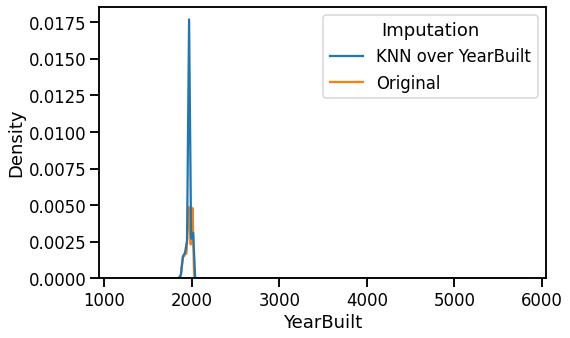

In [24]:
imputed_year_built = df_knnRegresion.YearBuilt.to_frame()
imputed_year_built['Imputation'] = 'KNN over YearBuilt'
original_year_build = df_merge.YearBuilt.dropna().to_frame()
original_year_build['Imputation'] = 'Original'
data = pandas.concat([imputed_year_built, original_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

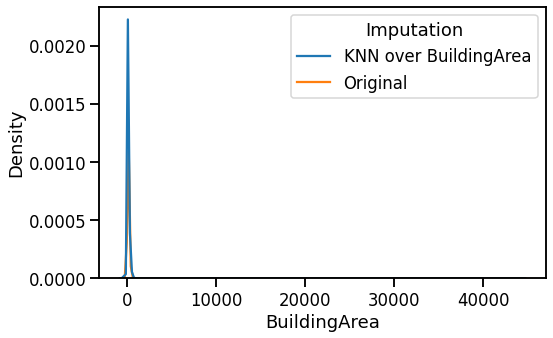

In [25]:
imputed_building = df_knnRegresion.BuildingArea.to_frame()
imputed_building['Imputation'] = 'KNN over BuildingArea'
original_building= df_merge.BuildingArea.dropna().to_frame()
original_building['Imputation'] = 'Original'
data = pandas.concat([imputed_building, original_building])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [26]:
df_knnRegresion.columns.values

array(['Type_h', 'Type_t', 'Type_u', ..., 'Landsize_433014.0',
       'YearBuilt', 'BuildingArea'], dtype=object)

In [27]:
feature_cols = ['Type', 'Suburb', 'Address','Method','Postcode','Rooms','Price','Bedroom2','Landsize']
feature_dict = list(melb_df[feature_cols].T.to_dict().values())
feature_dict[:2]

[{'Type': 'h',
  'Suburb': 'Abbotsford',
  'Address': '85 Turner St',
  'Method': 'S',
  'Postcode': 3067.0,
  'Rooms': 2,
  'Price': 1480000.0,
  'Bedroom2': 2.0,
  'Landsize': 202.0},
 {'Type': 'h',
  'Suburb': 'Abbotsford',
  'Address': '25 Bloomburg St',
  'Method': 'S',
  'Postcode': 3067.0,
  'Rooms': 2,
  'Price': 1035000.0,
  'Bedroom2': 2.0,
  'Landsize': 156.0}]

In [29]:

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [30]:
feature_matrix

<13580x13705 sparse matrix of type '<class 'numpy.float64'>'
	with 122220 stored elements in Compressed Sparse Row format>

In [31]:
if numpy.any(numpy.isnan(feature_matrix.data)):
  feature_matrix.data = numpy.nan_to_num(feature_matrix.data)

In [32]:
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = numpy.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matrix too big! Using only first {} of {} rows".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 709.97 MB
Matrix too big! Using only first 191 of 13580 rows
Final size: 9.99


In [33]:
if dense_feature_matrix.shape[0] < len(melb_df):
  melb_df_sample = melb_df.iloc[:dense_feature_matrix.shape[0]]
else:
  melb_df_sample = melb_df

In [34]:
scaled_dense_feature_matrix = dense_feature_matrix

In [35]:

from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape

(191, 15)

In [36]:
pca.explained_variance_ratio_

array([9.9999994e-01, 3.4452799e-07, 5.5615912e-09, 2.0436465e-12,
       7.2203994e-13, 5.7559534e-13, 4.5150209e-13, 3.8480213e-13,
       2.9104098e-13, 2.4455988e-13, 2.3812284e-13, 1.8707305e-13,
       1.2824801e-13, 8.6793149e-14, 2.2306763e-14], dtype=float32)

In [38]:
melb_df_sample[['pca1', 'pca2']] = proyected_features[:,:2]

<ipython-input-38-d0c371745b21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df_sample[['pca1', 'pca2']] = proyected_features[:,:2]
/home/micaela/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [41]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']
Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.570984,1.531969


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

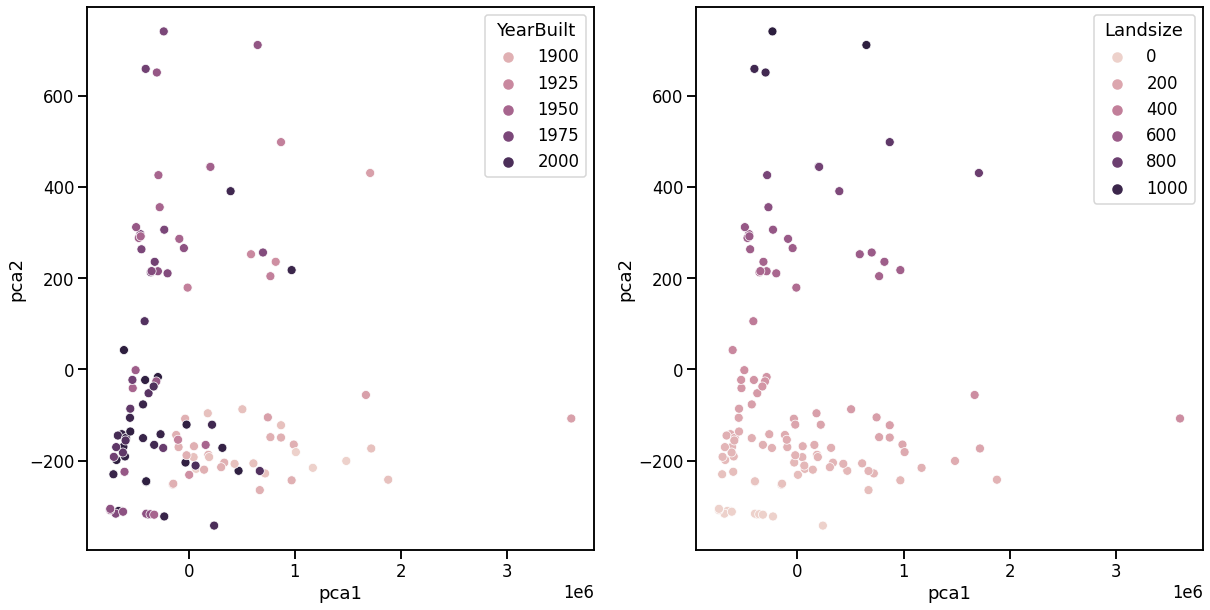

In [42]:

cols = ['YearBuilt', 'Landsize']
data = melb_df_sample[cols + ['pca1', 'pca2']][:1000].dropna(how='any')
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# Other variables to try: 'Price' 'Landsize' 'Price' 'YearBuilt'
seaborn.scatterplot(data=data, x='pca1', y='pca2',
                    hue='YearBuilt', ax=axes[0])  
seaborn.scatterplot(data=data, x='pca1', y='pca2',
                    hue='Landsize', ax=axes[1])

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
